# MANUELA CASTILLA RUSSO CORREA
Para o meu projeto, foi escolhido os fatores:

(1)Mulheres empregadas entre a idade de 15-24. 

(2)A relação de meninas para homens na educação (fundamental 1 e 2) para relacionar com o Índice de Desenvolvimento Human


Com isso, foi feito a seguinte questão: 

#### A quantidade de mulheres que tiveram educação influência no número destas que têm emprego, influenciando assim o IDH do país?


Para isso, mostrarei os passos para cada código feito e suas análises

## PASSO 1: JUNTANDO AS TABELAS E O ANO A SER ESTUDADO: 2007

In [2]:
#Primeiramente importamos para poder realizar o código
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#baixando todos os excels
idh = pd.read_excel('hdi_human_development_index.xlsx')
gender_edu = pd.read_excel("ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.xlsx")
employment = pd.read_excel("females_aged_15_24_employment_rate_percent.xlsx")

###### 1. Ao baixar os documentos, selecionei o ano que queria analisar, o ano de 2007:

In [4]:
#pegando as partes que você quer
idh_07 = idh.loc[:,["geo",2007]]
gender_edu_07 = gender_edu.loc[:,["geo",2007]]
employment_07 = employment.loc[:,["geo",2007]]

###### 2. Para analisar mais facilmente os dados, juntei os dados em só um dataframe Para isso, ajustei os index em comum de cada tabela para que os países se "colidissem".

In [5]:
#ajustando o index
idh_idx = idh_07.set_index("geo")
gender_edu_idx = gender_edu_07.set_index("geo")
employment_idx = employment_07.set_index("geo")

In [6]:
idh_idx = idh_idx.rename(index = str, columns = lambda column: "IDH in 2007")
gender_edu_idx = gender_edu_idx.rename(index = str, columns = lambda column: "Gender_edu in 2007" )
employment_idx = index = employment_idx.rename(str, columns = lambda column: "gender_employ in 2007")

###### 3. Assim, iniciei o processo de join (juntar os dados):

In [7]:
#join 1.0
idh_gender = idh_idx.join(gender_edu_idx, how="inner", lsuffix="_idh", rsuffix="_gender")

In [8]:
#join 2.0
data = idh_gender.join(employment_idx, how="inner", lsuffix="_idh", rsuffix="_WomanEmployment")

In [9]:
data.head(2)

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
geo,,,
Afghanistan,0.433,0.570,28.5
Albania,0.713,0.982,31.0


###### 4. Por fim, eu salvei essa nova tabela em um dataframe

In [10]:
data.to_csv("APS1: junção do employment, gender, idh de 2007.csv")
data.to_excel("APS1: junção do employment, gender, idh de 2007.xlsx")

## PASSO 2: Criando os gráficos e Análise

###### 1. Primeiramente fizemos o comando de correlação, para ver quanto cada fator se relaciona:

In [11]:
data.corr()

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
IDH in 2007,1.000000,0.638911,-0.280788
Gender_edu in 2007,0.638911,1.000000,-0.186184
gender_employ in 2007,-0.280788,-0.186184,1.000000


#### A partir desta tabela, foi possível já ter uma ideia quanto cada fator influencia o outro. 
Lembrando que, se a correlação resulta 1 ou - 1, quer dizer que existe uma relação forte entre os fatores. Assim, quanto mais perto a 0, menos relacionados entre si são.

###### 2. Colocamos essa correlação, diante de um gráfico com a sua reta de tendência

Para isso, foi usado o seguinte código

In [18]:
def reta(data_x, data_y):    
    a = data_y.cov(data_x) / data_x.var()
    b = data_y.mean() - a*data_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_x, data_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('employment 2007')

    plt.plot((data_x.min(), data_x.max()), (a*data_x.min()+b, a*data_x.max()+b), color='blue')

    plt.tight_layout()


### IDH em 2007 x mulheres empregadas no total em 2007

Ajuste linear entre X3 e X4:
Coeficiente linear: 53.90476855718466
Coeficiente angular: -27.762687739588912


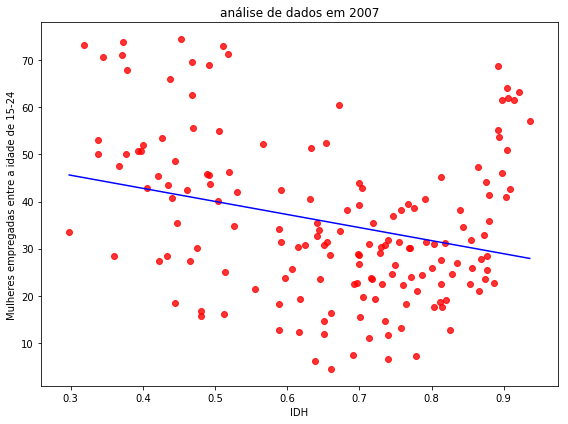

In [28]:
reta( data["IDH in 2007"],data["gender_employ in 2007"] )
plt.title('análise de dados em 2007')
plt.xlabel('IDH')
plt.ylabel('Mulheres empregadas entre a idade de 15-24')
plt.show()

Nesse gráfico, relacionando o IDH com o número de mulheres empregadas, podemos ver que existe uma relação mínima (-0.195).

### IDH em 2007 x quantidade que mulheres tiveram educação

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7530423721997657
Coeficiente angular: 0.32528255129050754


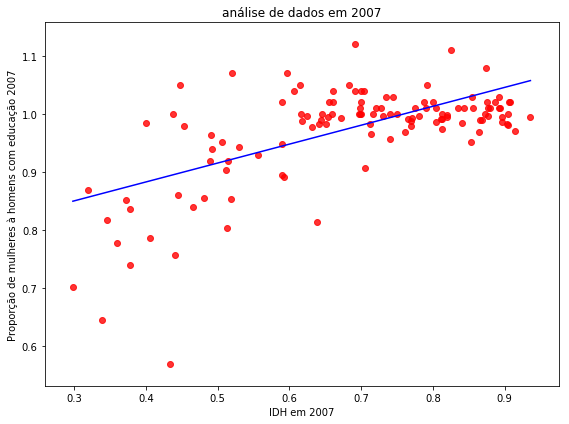

In [29]:
reta( data["IDH in 2007"],data["Gender_edu in 2007"] )
plt.title('análise de dados em 2007')
plt.xlabel('IDH em 2007')
plt.ylabel('Proporção de mulheres à homens com educação 2007')
plt.show()

Ao contrário do primeiro gráfico, existe uma relação clara entre o IDH dos países com a quantidade de mulheres que tiveram uma educação. Assim a correlação entre este dois fatores é aproximadamente 0.64.

### Proporção de mulheres à homens com educação x mulheres empregadas no total em 2007

Ajuste linear entre X3 e X4:
Coeficiente linear: 1.0035826825159493
Coeficiente angular: -0.0009827366873368549


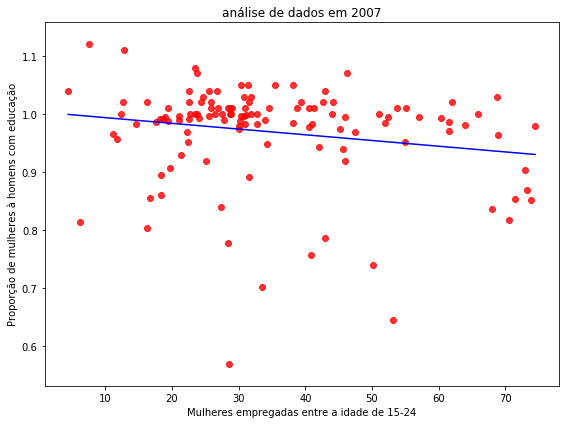

In [30]:
reta( data["gender_employ in 2007"],data["Gender_edu in 2007"] )
plt.title('análise de dados em 2007')
plt.xlabel('Mulheres empregadas entre a idade de 15-24')
plt.ylabel('Proporção de mulheres à homens com educação')
plt.show()

Por fim, podemos observar diante do gráfico acima de que não importa a quantidade de mulher empregada, não existe uma relação clara, e pode até se dizer que não existe uma relação, ou seja, os dois fatores não são proporcionais entre si.

### CONCLUSÃO

idh com mulheres empregadas:  Assim, pode se concluir de que não existe uma relação significativa.